<a href="https://colab.research.google.com/github/yasinsoylu1997/128-not-sampling/blob/main/vgg19_modelssss_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix
import keras
import keras.utils
from keras import utils as np_utils
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
#!pip install visualkeras
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from sklearn.metrics import log_loss
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
!pip install visualkeras
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
labels = ['Lung_Opacity','COVID','Normal','Viral Pneumonia']

In [4]:
X = []
y = []
image_size = 128
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/tezz3/COVID-19_Radiography_Dataset_masked',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)
        y.append(i)

        
X = np.array(X)
y = np.array(y)

100%|██████████| 1345/1345 [00:29<00:00, 45.08it/s] 


In [5]:
train_images, test_images,train_labels, test_labels = train_test_split(X , y , test_size=0.25, random_state=42,shuffle=True)

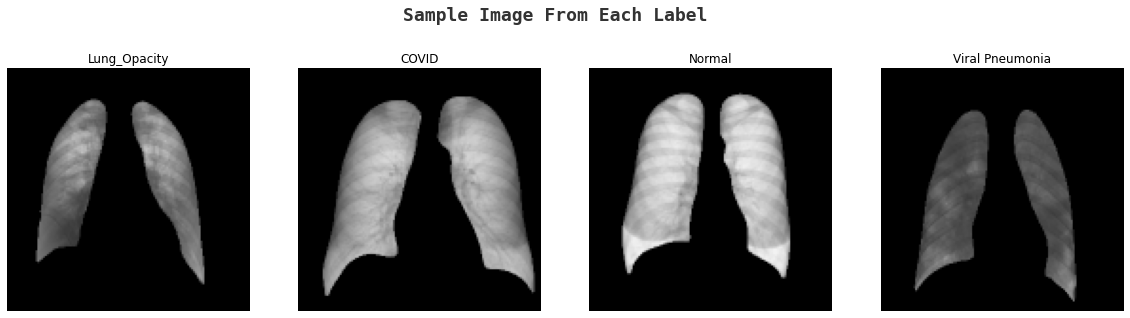

In [6]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y[j]==i:
            ax[k].imshow(X[j])
            ax[k].set_title(y[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

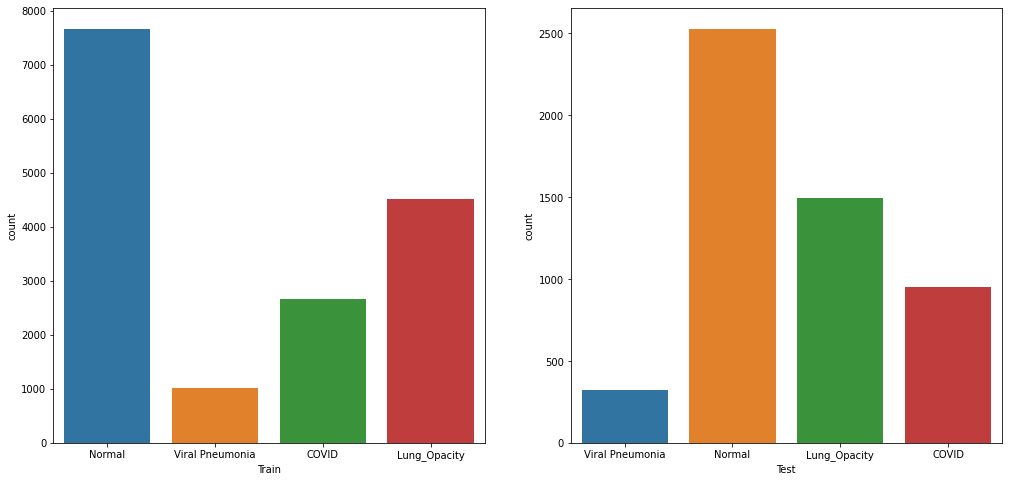

In [7]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [10]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [11]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [73]:
from tensorflow.keras.applications import VGG19
VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG19_model.layers:
	layer.trainable = False
    
VGG19_model.summary()  #Trainable parameters will be 0

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

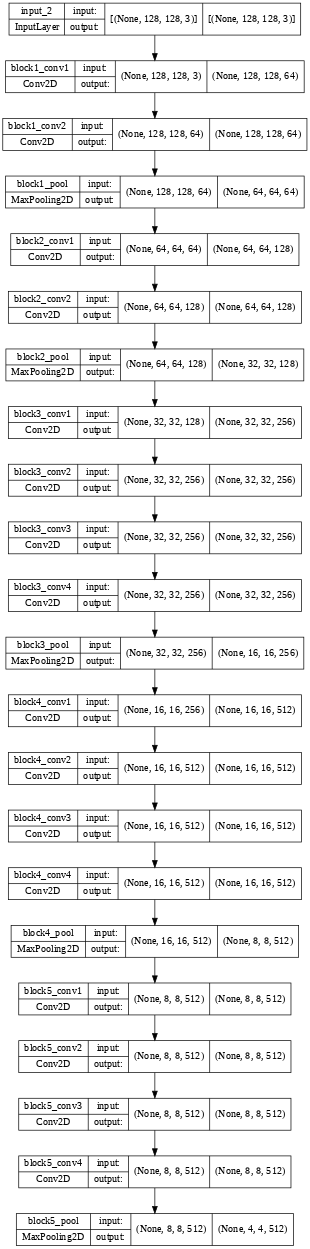

In [74]:
from keras.utils.vis_utils import plot_model

plot_model(VGG19_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=50)

In [75]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG19_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_model= features #This is our X input for model

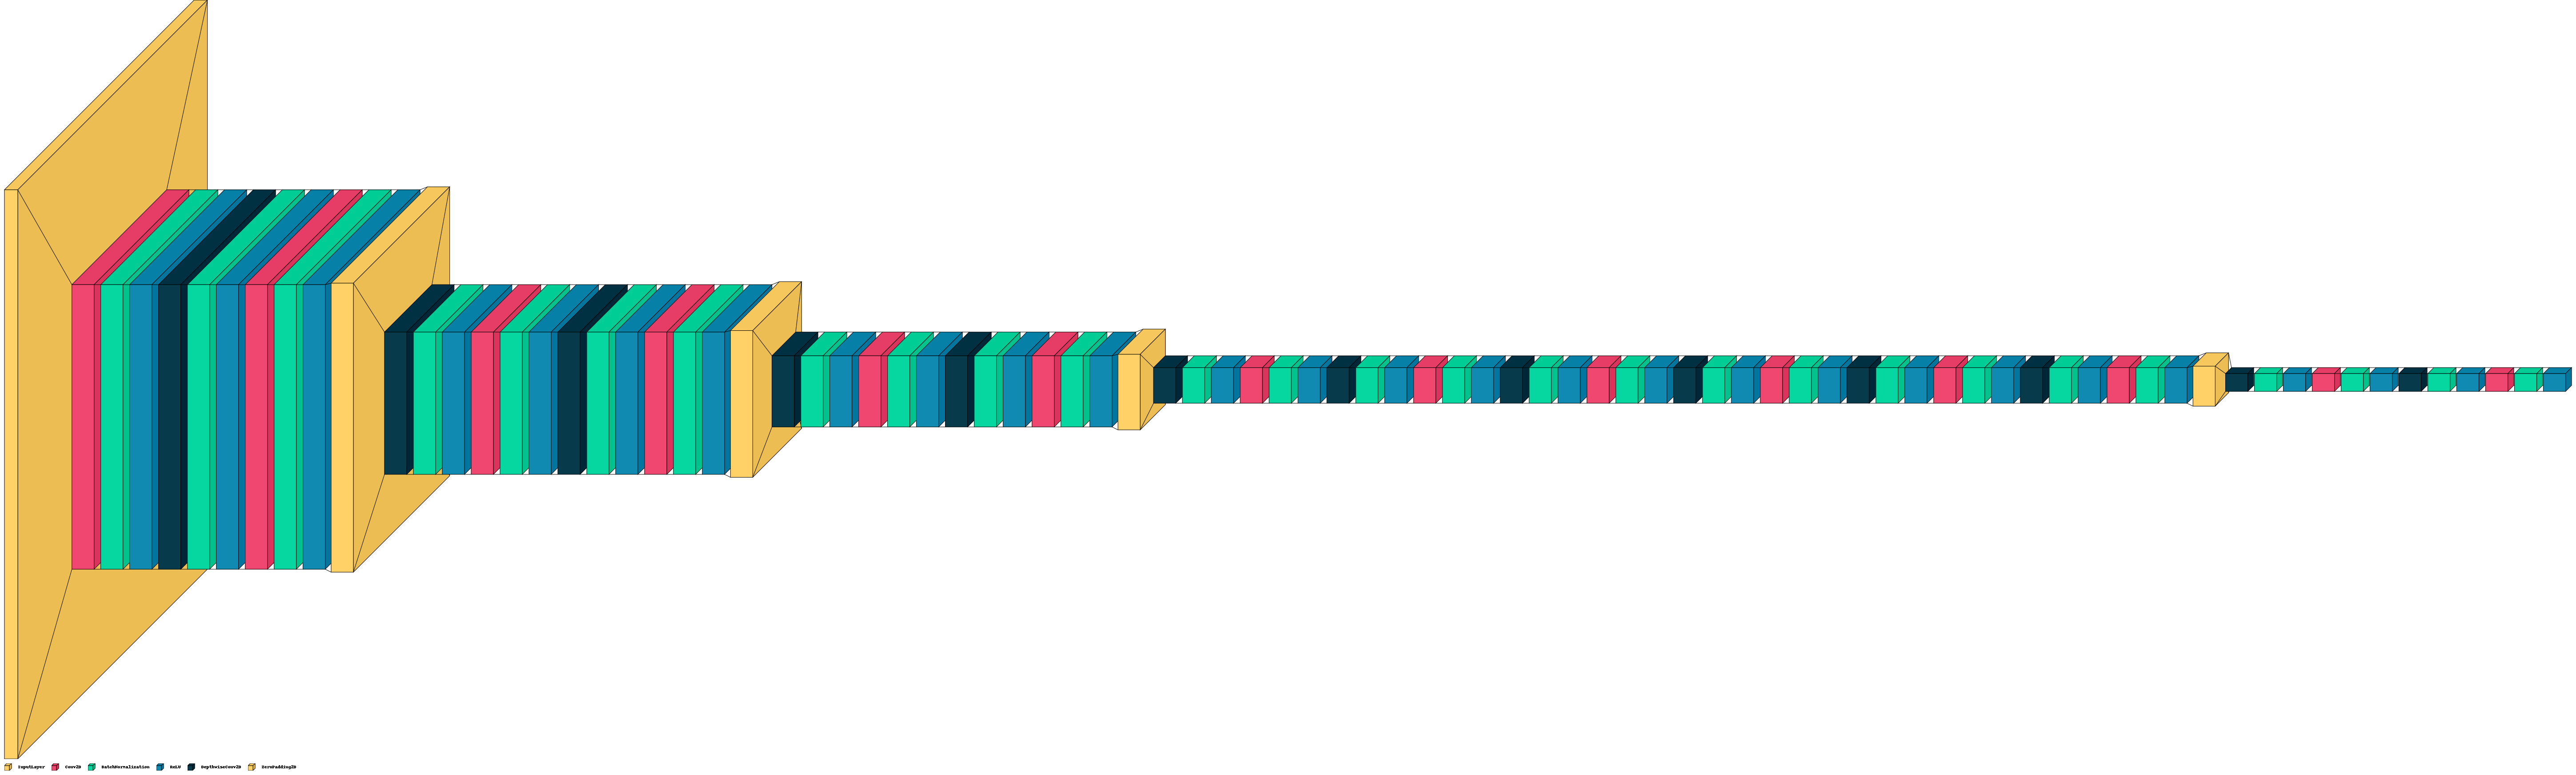

<Figure size 144x144 with 0 Axes>

In [16]:
import visualkeras
from PIL import ImageFont
plt.figure(figsize=(2, 2))
visualkeras.layered_view(MobilNet_model, legend=True,spacing=15,scale_xy = 10 , scale_z = 10, max_z = 50) 

In [76]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X_for_model, y_train)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(y_test, predicted)
    mse = metrics.mean_squared_error(y_test, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
    r2_square = metrics.r2_score(y_test, predicted)
    Accuracy= metrics.accuracy_score(y_test,predicted)

    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('Accuracy', Accuracy)



    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(y_test, predicted)
    mse = metrics.mean_squared_error(y_test, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
    r2_square = metrics.r2_score(y_test, predicted)
    Accuracy= metrics.accuracy_score(y_test,predicted)

    return mae, mse, rmse, r2_square, Accuracy

# knn

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_for_model, y_train)
knn_model

KNeighborsClassifier()

In [78]:
X_test_feature = VGG19_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
#Now predict using the trained RF model. 
prediction = knn_model.predict(X_test_features)

In [79]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, prediction)

Test set evaluation:
_____________________________________
MAE: 0.3119803476946334
MSE: 0.4733560090702948
RMSE: 0.6880087274666614
R2 Square 0.3465243161813423
Accuracy 0.767384731670446
__________________________________


In [80]:
results_df = pd.DataFrame(data=[["KNeighborsClassifier", *evaluate(y_test, prediction) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_VGG19_model'])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_VGG19_model
0,KNeighborsClassifier,0.31198,0.473356,0.688009,0.346524,0.767385


In [81]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.68      0.47      0.56       949
           1       0.76      0.70      0.73      1493
           2       0.77      0.92      0.84      2527
           3       0.96      0.80      0.88       323

    accuracy                           0.77      5292
   macro avg       0.79      0.72      0.75      5292
weighted avg       0.76      0.77      0.76      5292



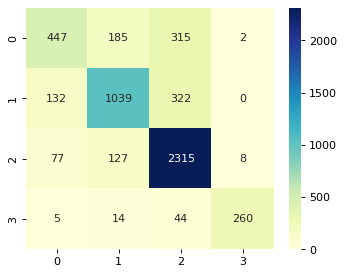

In [82]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(5, 4), dpi=80)
cm = confusion_matrix(y_test,prediction)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# DecisionTreeClassifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier()
cart_model = cart_model.fit(X_for_model, y_train)
cart_model

DecisionTreeClassifier()

In [84]:
X_test_feature = VGG19_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
#Now predict using the trained RF model. 
prediction = cart_model.predict(X_test_features)

In [85]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, prediction)

Test set evaluation:
_____________________________________
MAE: 0.4786470143613001
MSE: 0.7583144368858654
RMSE: 0.8708125153475147
R2 Square -0.04686543679212529
Accuracy 0.6526832955404384
__________________________________


In [86]:
results_df_2 = pd.DataFrame(data=[["DecisionTreeClassifier", *evaluate(y_test, prediction)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_VGG19_model' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_VGG19_model
0,KNeighborsClassifier,0.311980,0.473356,0.688009,0.346524,0.767385
1,DecisionTreeClassifier,0.478647,0.758314,0.870813,-0.046865,0.652683


In [87]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.42      0.42      0.42       949
           1       0.63      0.61      0.62      1493
           2       0.75      0.76      0.76      2527
           3       0.64      0.70      0.67       323

    accuracy                           0.65      5292
   macro avg       0.61      0.62      0.62      5292
weighted avg       0.65      0.65      0.65      5292



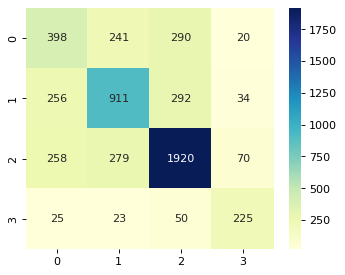

In [88]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(5, 4), dpi=80)
cm = confusion_matrix(y_test,prediction)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# Lojistik regresyon

In [89]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_for_model, y_train)
lr_model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [90]:
X_test_feature = VGG19_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
#Now predict using the trained RF model. 
prediction = lr_model.predict(X_test_features)

In [91]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, prediction)

Test set evaluation:
_____________________________________
MAE: 0.2660619803476946
MSE: 0.40778533635676495
RMSE: 0.638580720314014
R2 Square 0.43704569833107243
Accuracy 0.8036659108087679
__________________________________


In [92]:
results_df_2 = pd.DataFrame(data=[["Lojistik regresyon", *evaluate(y_test, prediction)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_VGG19_model' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_VGG19_model
0,KNeighborsClassifier,0.311980,0.473356,0.688009,0.346524,0.767385
1,DecisionTreeClassifier,0.478647,0.758314,0.870813,-0.046865,0.652683
2,Lojistik regresyon,0.266062,0.407785,0.638581,0.437046,0.803666


In [93]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      0.55      0.61       949
           1       0.79      0.77      0.78      1493
           2       0.83      0.91      0.87      2527
           3       0.92      0.88      0.90       323

    accuracy                           0.80      5292
   macro avg       0.81      0.78      0.79      5292
weighted avg       0.80      0.80      0.80      5292



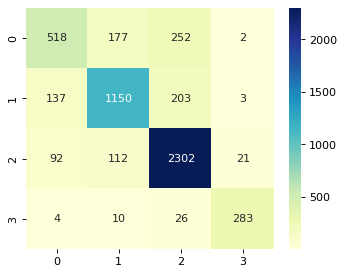

In [94]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(5, 4), dpi=80)
cm = confusion_matrix(y_test,prediction)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# LGBMClassifier

In [95]:
from lightgbm import LGBMClassifier

LGBM_model = LGBMClassifier()
LGBM_model = LGBM_model.fit(X_for_model, y_train)
LGBM_model

LGBMClassifier()

In [96]:
X_test_feature = VGG19_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
#Now predict using the trained RF model. 
prediction = LGBM_model.predict(X_test_features)

In [97]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, prediction)

Test set evaluation:
_____________________________________
MAE: 0.2399848828420257
MSE: 0.36432350718065004
RMSE: 0.6035921695819537
R2 Square 0.4970454617156199
Accuracy 0.8210506424792139
__________________________________


In [98]:
results_df_2 = pd.DataFrame(data=[["LGBMClassifier", *evaluate(y_test, prediction)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_VGG19_model' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_VGG19_model
0,KNeighborsClassifier,0.311980,0.473356,0.688009,0.346524,0.767385
1,DecisionTreeClassifier,0.478647,0.758314,0.870813,-0.046865,0.652683
2,Lojistik regresyon,0.266062,0.407785,0.638581,0.437046,0.803666
3,LGBMClassifier,0.239985,0.364324,0.603592,0.497045,0.821051


In [99]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.77      0.56      0.65       949
           1       0.79      0.81      0.80      1493
           2       0.84      0.92      0.88      2527
           3       0.96      0.87      0.91       323

    accuracy                           0.82      5292
   macro avg       0.84      0.79      0.81      5292
weighted avg       0.82      0.82      0.82      5292



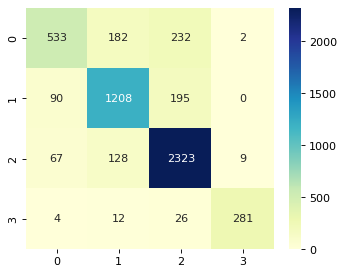

In [100]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(5, 4), dpi=80)
cm = confusion_matrix(y_test,prediction)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# RandomForestClassifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_for_model, y_train)
rf_model

RandomForestClassifier()

In [103]:
X_test_feature = VGG19_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
#Now predict using the trained RF model. 
prediction = rf_model.predict(X_test_features)

In [104]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, prediction)

Test set evaluation:
_____________________________________
MAE: 0.2868480725623583
MSE: 0.427437641723356
RMSE: 0.6537871532259991
R2 Square 0.4099153705397989
Accuracy 0.7828798185941043
__________________________________


In [105]:
results_df_2 = pd.DataFrame(data=[["RandomForestClassifier", *evaluate(y_test, prediction)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_VGG19_model' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_VGG19_model
0,KNeighborsClassifier,0.311980,0.473356,0.688009,0.346524,0.767385
1,DecisionTreeClassifier,0.478647,0.758314,0.870813,-0.046865,0.652683
2,Lojistik regresyon,0.266062,0.407785,0.638581,0.437046,0.803666
3,LGBMClassifier,0.239985,0.364324,0.603592,0.497045,0.821051
4,RandomForestClassifier,0.286848,0.427438,0.653787,0.409915,0.782880


In [106]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.40      0.54       949
           1       0.73      0.80      0.76      1493
           2       0.79      0.91      0.85      2527
           3       0.96      0.79      0.87       323

    accuracy                           0.78      5292
   macro avg       0.83      0.73      0.75      5292
weighted avg       0.79      0.78      0.77      5292



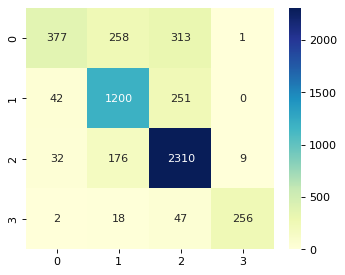

In [107]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(5, 4), dpi=80)
cm = confusion_matrix(y_test,prediction)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# GaussianNB

In [108]:
from sklearn.naive_bayes import GaussianNB


GB_model = GaussianNB()
GB_model = GB_model.fit(X_for_model, y_train)
GB_model

GaussianNB()

In [109]:
X_test_feature = VGG19_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
#Now predict using the trained RF model. 
prediction = GB_model.predict(X_test_features)

In [110]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, prediction)

Test set evaluation:
_____________________________________
MAE: 0.5398715041572184
MSE: 0.8970143613000756
RMSE: 0.947108421090255
R2 Square -0.23834294254976784
Accuracy 0.6201814058956916
__________________________________


In [111]:
results_df_2 = pd.DataFrame(data=[["GaussianNB", *evaluate(y_test, prediction)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_VGG19_model' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_VGG19_model
0,KNeighborsClassifier,0.311980,0.473356,0.688009,0.346524,0.767385
1,DecisionTreeClassifier,0.478647,0.758314,0.870813,-0.046865,0.652683
2,Lojistik regresyon,0.266062,0.407785,0.638581,0.437046,0.803666
3,LGBMClassifier,0.239985,0.364324,0.603592,0.497045,0.821051
4,RandomForestClassifier,0.286848,0.427438,0.653787,0.409915,0.782880
5,GaussianNB,0.539872,0.897014,0.947108,-0.238343,0.620181


In [112]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.53      0.22      0.31       949
           1       0.67      0.56      0.61      1493
           2       0.70      0.78      0.74      2527
           3       0.31      0.82      0.45       323

    accuracy                           0.62      5292
   macro avg       0.55      0.60      0.53      5292
weighted avg       0.64      0.62      0.61      5292



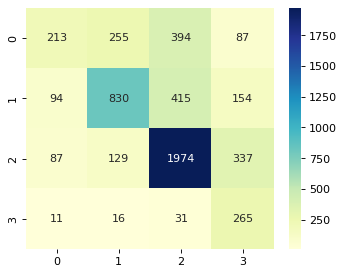

In [113]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(5, 4), dpi=80)
cm = confusion_matrix(y_test,prediction)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# SGDClassifier

In [114]:
from sklearn.linear_model import SGDClassifier

SGD_model = SGDClassifier()
SGD_model = SGD_model.fit(X_for_model, y_train)
SGD_model

SGDClassifier()

In [115]:
X_test_feature = VGG19_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
#Now predict using the trained RF model. 
prediction = SGD_model.predict(X_test_features)

In [116]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, prediction)

Test set evaluation:
_____________________________________
MAE: 0.2849584278155707
MSE: 0.4452003023431595
RMSE: 0.6672333192693238
R2 Square 0.3853937281130708
Accuracy 0.7940287226001512
__________________________________


In [117]:
results_df_2 = pd.DataFrame(data=[["SGDClassifier", *evaluate(y_test, prediction)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_VGG19_model' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_VGG19_model
0,KNeighborsClassifier,0.311980,0.473356,0.688009,0.346524,0.767385
1,DecisionTreeClassifier,0.478647,0.758314,0.870813,-0.046865,0.652683
2,Lojistik regresyon,0.266062,0.407785,0.638581,0.437046,0.803666
3,LGBMClassifier,0.239985,0.364324,0.603592,0.497045,0.821051
4,RandomForestClassifier,0.286848,0.427438,0.653787,0.409915,0.782880
5,GaussianNB,0.539872,0.897014,0.947108,-0.238343,0.620181
6,SGDClassifier,0.284958,0.445200,0.667233,0.385394,0.794029


In [118]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.25      0.40       949
           1       0.75      0.85      0.80      1493
           2       0.79      0.94      0.86      2527
           3       0.89      0.94      0.92       323

    accuracy                           0.79      5292
   macro avg       0.85      0.75      0.74      5292
weighted avg       0.82      0.79      0.76      5292



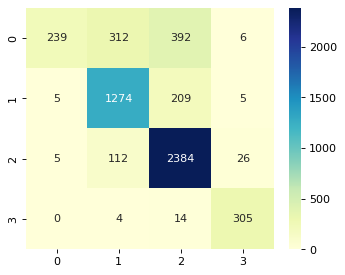

In [119]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(5, 4), dpi=80)
cm = confusion_matrix(y_test,prediction)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# SVC

In [120]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear")
svm_model = svm_model.fit(X_for_model, y_train)
svm_model

SVC(kernel='linear')

In [121]:
X_test_feature = VGG19_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
#Now predict using the trained RF model. 
prediction = svm_model.predict(X_test_features)

In [122]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, prediction)

Test set evaluation:
_____________________________________
MAE: 0.23677248677248677
MSE: 0.3524187452758881
RMSE: 0.5936486715860553
R2 Square 0.5134801795122568
Accuracy 0.8201058201058201
__________________________________


In [123]:
results_df_2 = pd.DataFrame(data=[["SVC", *evaluate(y_test, prediction)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_VGG19_model' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_VGG19_model
0,KNeighborsClassifier,0.311980,0.473356,0.688009,0.346524,0.767385
1,DecisionTreeClassifier,0.478647,0.758314,0.870813,-0.046865,0.652683
2,Lojistik regresyon,0.266062,0.407785,0.638581,0.437046,0.803666
3,LGBMClassifier,0.239985,0.364324,0.603592,0.497045,0.821051
4,RandomForestClassifier,0.286848,0.427438,0.653787,0.409915,0.782880
5,GaussianNB,0.539872,0.897014,0.947108,-0.238343,0.620181
6,SGDClassifier,0.284958,0.445200,0.667233,0.385394,0.794029
7,SVC,0.236772,0.352419,0.593649,0.513480,0.820106


In [124]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       949
           1       0.80      0.77      0.79      1493
           2       0.86      0.89      0.88      2527
           3       0.93      0.90      0.92       323

    accuracy                           0.82      5292
   macro avg       0.82      0.81      0.82      5292
weighted avg       0.82      0.82      0.82      5292



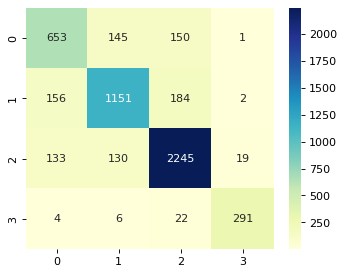

In [125]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(5, 4), dpi=80)
cm = confusion_matrix(y_test,prediction)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

In [126]:
modeller = [rf_model,GB_model,LGBM_model,SGD_model,lr_model,cart_model,svm_model,knn_model]


In [127]:
sonuc = []
from sklearn.metrics import accuracy_score

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy_VGG19_model"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test_features)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy_VGG19_model"])
    sonuclar = sonuclar.append(sonuc)
    

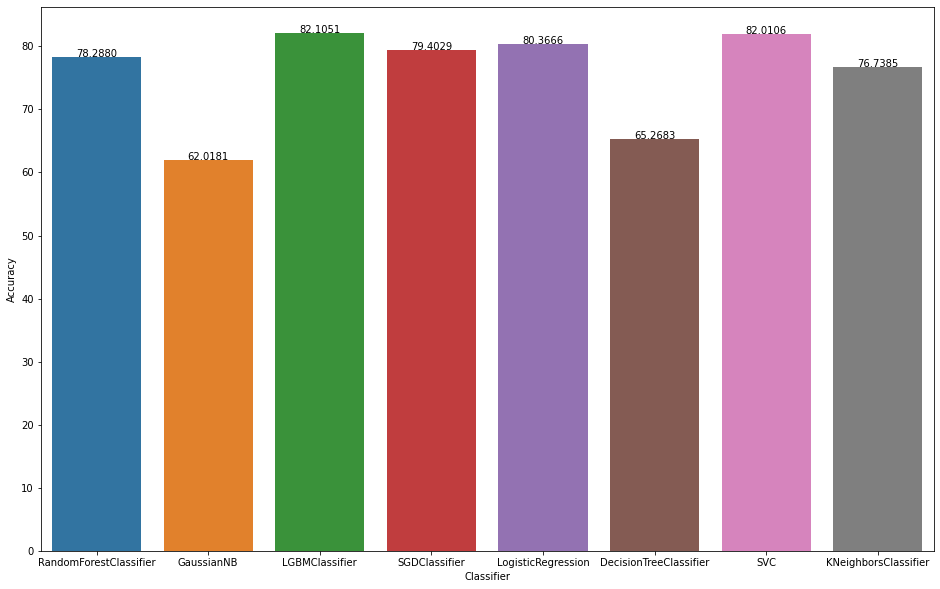

In [129]:
plt.figure(figsize=[16, 10])
axis = sns.barplot(x = 'Modeller', y = 'Accuracy_VGG19_model', data = sonuclar)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
  height = p.get_height()
  axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 

In [131]:
best_acc=sonuclar.sort_values(by=['Accuracy_VGG19_model'], ascending=False)
en_iyi_model_my_model=best_acc[:1]
en_iyi_model_my_model

,Modeller,Accuracy_VGG19_model
0,LGBMClassifier,82.105064


In [132]:
results_df


,Model,MAE,MSE,RMSE,R2 Square,Accuracy_VGG19_model
0,KNeighborsClassifier,0.311980,0.473356,0.688009,0.346524,0.767385
1,DecisionTreeClassifier,0.478647,0.758314,0.870813,-0.046865,0.652683
2,Lojistik regresyon,0.266062,0.407785,0.638581,0.437046,0.803666
3,LGBMClassifier,0.239985,0.364324,0.603592,0.497045,0.821051
4,RandomForestClassifier,0.286848,0.427438,0.653787,0.409915,0.782880
5,GaussianNB,0.539872,0.897014,0.947108,-0.238343,0.620181
6,SGDClassifier,0.284958,0.445200,0.667233,0.385394,0.794029
7,SVC,0.236772,0.352419,0.593649,0.513480,0.820106


In [133]:
from google.colab import files

results_df.to_csv('output_vgg19.csv', encoding = 'utf-8-sig') 
files.download('output_vgg19.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>